# Stochastic simulation - Assignment 1
#### Marleen Rijksen (10465030)

In [32]:
# necessary packages
from numba import jit
import numpy as np
from pyDOE import *
%pylab inline
pylab.rcParams['figure.figsize'] = [10, 6]
from scipy.stats import mstats

Populating the interactive namespace from numpy and matplotlib


## Visualizing the mandelbrot set

We create a nice visualization of the mandelbrot set. Part of the code below is based on the code that can be found on https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift?lang=en. 

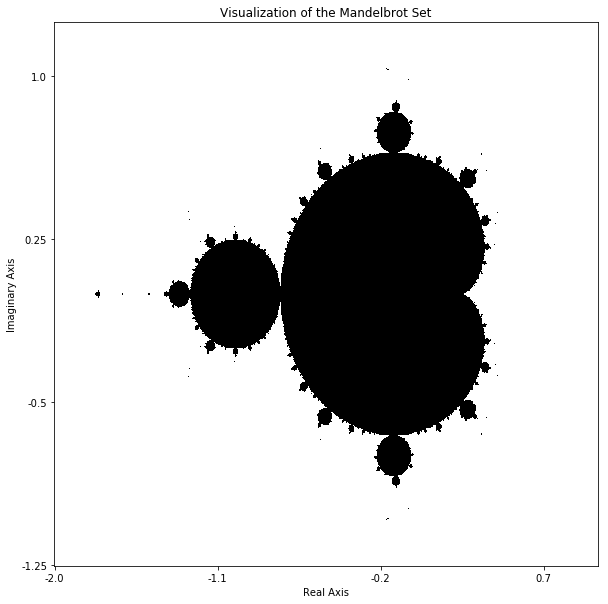

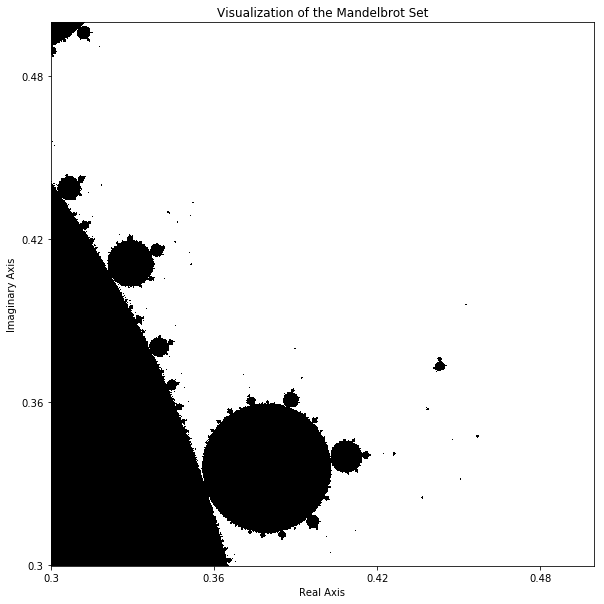

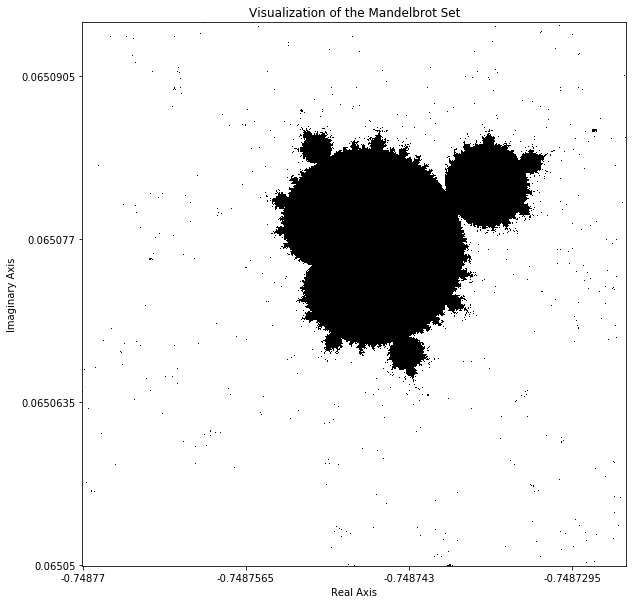

In [12]:
# compute if point is in mandelbrot set
@jit
def mandelbrot(creal,cimag,maxiter):
    
    # take real and imaginary parts
    real = creal
    imag = cimag
    for n in range(maxiter):
        
        # square both parts
        real2 = real*real
        imag2 = imag*imag
        
        # if iteration diverges, stop
        if real2 + imag2 > 4.0:
            return 1
        
        # compute new real and imag parts
        imag = 2 * real * imag + cimag
        real = real2 - imag2 + creal       
    return 0

# compute mandelbrot set array for certain area
@jit
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    
    # iterate over all positions in array
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i], r2[j], maxiter)
    return (r1, r2, n3)

# plot mandelbrot set
def mandelbrot_image(xmin, xmax, ymin, ymax, width=10, height=10, maxiter=256):
    
    # determine outlook of figure
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    
    # compute mandelbrot set
    x,y,z = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height, maxiter)
    
    # create nice figure with mandelbrot set
    fig, ax = plt.subplots(figsize=(width, height), dpi=72)
    ticks = np.arange(0, img_width, 3 * dpi)
    x_ticks = xmin + (xmax - xmin) * ticks / img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax - ymin) * ticks / img_width
    plt.yticks(ticks, y_ticks)
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title('Visualization of the Mandelbrot Set')
    #plt.title('Random Points Inside/Outside Mandelbrot Set')
    ax.imshow(z.T,origin='lower', cmap='gnuplot2')  
    return ax

# plot these ones when returning n in def mandelbrot function
# colormap = gnuplot2
mandelbrot_image(-2, 1, -1.25, 1.25, 10, 10, 2048)
mandelbrot_image(0.3, 0.5, 0.3, 0.5, 10, 10, 2048)
mandelbrot_image(-0.74877, -0.748725, 0.06505, 0.065095, 10, 10, 2048)

# to visualize the actual set return 0 or 1 in def mandelbrot function
# colormap = grey
#mandelbrot_image(-2, 1, -1.25, 1.25, 10, 10, 2048)

## Sampling method examples

### Random sampling

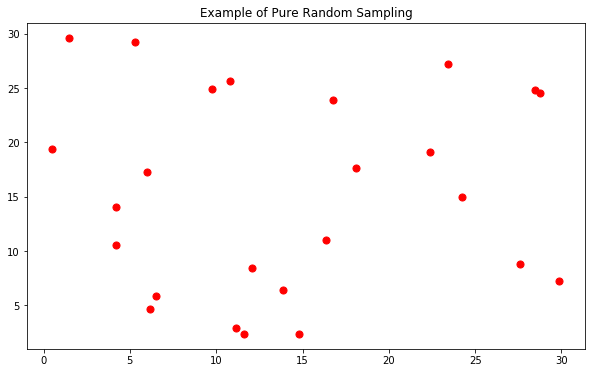

In [4]:
# specify area
xmin = 0
xmax = 30
ymin = 0
ymax = 30

# lists to store positions
x_list = []
y_list = []

# number of samples we take
n = 25

for i in range(n):
    x_list.append(np.random.uniform() * abs(xmin - xmax) + xmin)
    y_list.append(np.random.uniform() * abs(ymin - ymax) + ymin)

# plot all random points    
plt.scatter(x_list, y_list, c='r', s=50)
plt.title('Example of Pure Random Sampling')

### Latin hypercube sampling

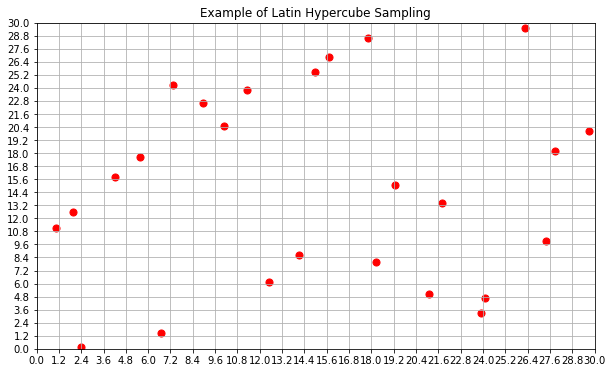

In [6]:
# specify area
xmin = 0
xmax = 30
ymin = 0
ymax = 30

# number of points
n = 25

# shuffle segment intervals
interval_x = np.linspace(0, n - 1, n)
interval_y = np.linspace(0, n - 1, n)
np.random.shuffle(interval_x)
np.random.shuffle(interval_y)

# define segmentsize
segmentsize_x = abs(xmin - xmax) / n
segmentsize_y = abs(ymin - ymax) / n

x_values = []
y_values = []

# compute x and y for each point
for i in range(n):
    start_x = xmin + interval_x[i] * segmentsize_x
    x_value = start_x + (np.random.uniform() * segmentsize_x)
    start_y = ymin + interval_y[i] * segmentsize_y
    y_value = start_y + (np.random.uniform() * segmentsize_y)
    x_values.append(x_value)
    y_values.append(y_value)
    
# plot all random points
plt.title('Example of Latin Hypercube Sampling')
plt.grid()
plt.xticks(np.arange(xmin, xmax + segmentsize_x, segmentsize_x))
plt.yticks(np.arange(ymin, ymax + segmentsize_y, segmentsize_y))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(x_values, y_values, s=50, c='r')   

### Orthogonal sampling

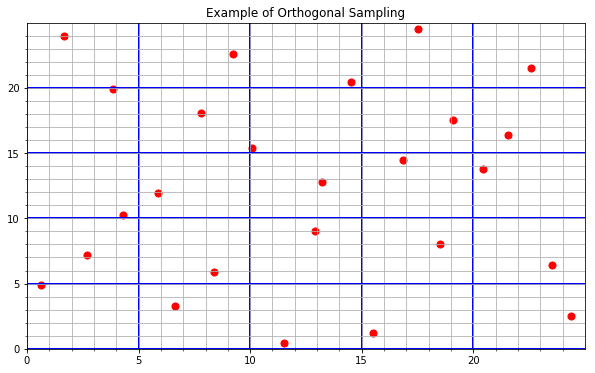

In [7]:
# specify number of samples
samples =  25
major = int(np.sqrt(samples))

# create array filled with zeros
x_list = np.zeros([major,major])
y_list = np.zeros([major, major])
m = 0
scale = 1 

# iterate over arrays and increment m each iteration
for i in range(major):
    for j in range(major):
        
        x_list[i][j] = y_list[i][j] = m
        m += 1
        
# shuffle arrays
for i in range(major):
    np.random.shuffle(x_list[i])
    np.random.shuffle(y_list[i])

# lists to store locations of random variables    
x_pos = []
y_pos = []

# create random number in each of the sub square
for i in range(major):
    for j in range(major):
        x =  scale * (x_list[i][j] + np.random.uniform())
        y =  scale * (y_list[j][i] + np.random.uniform())
        x_pos.append(x)
        y_pos.append(y)

# visualization of orthogonal sampling 
fig, ax = plt.subplots()
ax.scatter(x_pos, y_pos, c='r', s=50)
ax.set_title('Example of Orthogonal Sampling')
ax.set_xticks(range(0, samples, major), minor=False)
ax.set_xticks(range(0, samples, 1), minor = True)
ax.set_yticks(range(0, samples, major), minor=False)
ax.set_yticks(range(0, samples, 1), minor = True)
ax.set_xlim(0,samples)
ax.set_ylim(0,samples)
ax.yaxis.grid(True, which='major', color='b', linewidth=2)
ax.yaxis.grid(True, which='minor')
ax.xaxis.grid(True, which='major', color='b', linewidth=2)
ax.xaxis.grid(True, which='minor')
plt.show()

## Functions to compute area of Mandelbrot set

In [45]:
# compute area of mandelbrot set for random sampling
def area_mandelbrot_set(xmin, xmax, ymin, ymax, width, height, n, maxiter=230, plot=False):
    
    dpi = 72
    
    # number of points in set
    n_set = 0
    
    # save positions of points inside set
    n_set_x = []
    n_set_y = []
    
    # area of whole image
    area = (xmax - xmin) * (ymax - ymin)
    
    # create mandelbrot image
    if plot == True:
        ax = mandelbrot_image(xmin, xmax, ymin, ymax, width=width, height=height, maxiter=maxiter)

    # determine if visited points are in the set
    for i in range(n):
        x = np.random.uniform(xmin, xmax) 
        y = np.random.uniform(ymin, ymax)
        
        # compute indices of points in array
        if plot == True:
            x_ind = (x - xmin) / (xmax - xmin) * dpi * width
            y_ind = (y - ymin) / (ymax - ymin) *dpi * height
        
        # count points in the set and plot them
        if mandelbrot(x, y, maxiter) == 0:
            n_set += 1
            if plot == True:
                ax.scatter(x_ind, y_ind, color='g')
        
        # points outside the set
        elif plot == True:
            ax.scatter(x_ind, y_ind, color='b')
    
    # determine the area of the set
    area_set = (n_set / n) * area    
    return area_set

# calculate area of mandelbrot set with antithetic variables
def area_mandelbrot_set_antithetic(xmin, xmax, ymin, ymax, width, height, n, maxiter=230):
    
    dpi = 72
    n = int(n / 2)
    
    # number of points in both sets
    n_set_1 = 0
    n_set_2 = 0
    
    # area of whole image
    area = (xmax - xmin) * (ymax - ymin)

    # determine if visited points are in the set for u and u-1
    for i in range(n):
        rand1 = np.random.uniform()
        rand2 = np.random.uniform()
        
        # random points u
        x1 = rand1 * abs(xmin - xmax) + xmin   
        y1 = rand2 * abs(ymin - ymax) + ymin 
        
        # random points 1 - u
        x2 = (1 - rand1) * abs(xmin - xmax) + xmin
        y2 = (1 - rand2) * abs(ymin - ymax) + ymin
        
        # count points in the set for both random points
        if mandelbrot(x1, y1, maxiter) == 0:
            n_set_1 += 1
        if mandelbrot(x2, y2, maxiter) == 0:
            n_set_2 += 1
            
    # determine the area of the set based on both computations
    area_1 = (n_set_1 / n) * area
    area_2 = (n_set_2 / n) * area
    area_set = (area_1 + area_2) / 2
    return area_set, area_1, area_2

# calculate area of mandelbrot set with lh sampling
def area_mandelbrot_set_latinh(xmin, xmax, ymin, ymax, width, height, n, maxiter=230, plot=False):
    
    dpi = 72
    
    # number of points in set
    n_set = 0
    
    # area of whole image
    area = (xmax - xmin) * (ymax - ymin)
    
    # shuffle segment intervals
    interval_x = np.linspace(0, n - 1, n)
    interval_y = np.linspace(0, n - 1, n)
    np.random.shuffle(interval_x)
    np.random.shuffle(interval_y)

    # define segmentsize
    segmentsize_x = abs(xmin - xmax) / n
    segmentsize_y = abs(ymin - ymax) / n

    # determine if visited points are in the set
    for i in range(n):
        start_x = xmin + interval_x[i] * segmentsize_x
        x = start_x + (np.random.uniform() * segmentsize_x)
        start_y = ymin + interval_y[i] * segmentsize_y
        y = start_y + (np.random.uniform() * segmentsize_y)
        
        # count points in the set 
        if mandelbrot(x, y, maxiter) == 0:
            n_set += 1
            
    # determine the area of the set
    area_set = (n_set / n) * area    
    return area_set

# calculate area of mandelbrot set with orthogonal sampling
def area_mandelbrot_set_ortho(xmin, xmax, ymin, ymax, width, height, n, maxiter=230, plot=False):
    
    dpi = 72
    
    # number of points in set
    n_set = 0
    
    # area of whole image
    area = (xmax - xmin) * (ymax - ymin)
    
    major = int(np.sqrt(n))

    # create array filled with zeros
    x_list = np.zeros([major,major])
    y_list = np.zeros([major, major])
    m = 0
    
    # determine intervals
    scale = 1 / n

    # iterate over arrays and increment m each iteration
    for i in range(major):
        for j in range(major):
            x_list[i][j] = y_list[i][j] = m
            m += 1

    # shuffle arrays
    for i in range(major):
        np.random.shuffle(x_list[i])
        np.random.shuffle(y_list[i])

    # create random number in each of the sub square
    for i in range(major):
        for j in range(major):
            x =  (scale * (x_list[i][j] + np.random.uniform())) * abs(xmin - xmax) + xmin
            y =  (scale * (y_list[j][i] + np.random.uniform())) * abs(ymin - ymax) + ymin
            
            # count points in the set 
            if mandelbrot(x, y, maxiter) == 0:
                n_set += 1
            
    # determine the area of the set
    area_set = (n_set / n) * area    
    return area_set

## Functions to compute std and mean for varying number of simulations

In [40]:
# compute mean area and std for different number of simulations
# this one is for random sampling
def area_std_rs_vary_numsim(iterations, s, k):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std for all num_sim
    fin_area = []
    fin_std = []
    num_sim_list = [100]
    area_list = []
    
    # start with 100 data values
    for i in range(100):
        area = area_mandelbrot_set(xmin, xmax, ymin, ymax, 10, 10, s, iterations, plot=False)
        area_list.append(area)
        
    # compute mean and std
    mean = sum(area_list) / num_sim_list[0]
    std = np.std(area_list) / np.sqrt(num_sim_list[0])
    fin_area.append(mean)
    fin_std.append(std)
    
    # now keep adding in total k data points
    for i in range(k):
        area = area_mandelbrot_set(xmin, xmax, ymin, ymax, 10, 10, s, iterations, plot=False)
        area_list.append(area)
        
        # compute new mean and std after adding one data value
        mean = sum(area_list) / (num_sim_list[i] + 1)
        fin_area.append(mean)
        
        # compute confidence interval
        std = np.std(area_list) / np.sqrt(num_sim_list[i] + 1) 
        fin_std.append(std)
        num_sim_list.append(num_sim_list[i] + 1)
    
    # check if areas are normally distributed
    z, pval = mstats.normaltest(area_list)
    if pval > 0.055:
        print('Normally distributed')
    return fin_area, fin_std, num_sim_list

# compute mean area and std for different number of simulations
# this one is for latin hypercube sampling
def area_std_latinh_vary_numsim(iterations, s, k):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std for all num_sim
    fin_area = []
    fin_std = []
    num_sim_list = [100]
    area_list = []
    
    # start with 100 data values
    for i in range(100):
        area = area_mandelbrot_set_latinh(xmin, xmax, ymin, ymax, 10, 10, s, iterations, plot=False)
        area_list.append(area)
        
    # compute mean and confidence interval
    mean = sum(area_list) / num_sim_list[0]
    std = np.std(area_list)/ np.sqrt(num_sim_list[0])
    fin_area.append(mean)
    fin_std.append(std)
    
    # now keep adding in total k data points
    for i in range(k):
        area = area_mandelbrot_set_latinh(xmin, xmax, ymin, ymax, 10, 10, s, iterations, plot=False)
        area_list.append(area)
        
        # compute new mean after adding one data value
        mean = sum(area_list) / (num_sim_list[i] + 1)
        fin_area.append(mean)
        
        # compute confidence interval
        std = np.std(area_list) / np.sqrt(num_sim_list[i] + 1) 
        fin_std.append(std)
        num_sim_list.append(num_sim_list[i] + 1)
    
    # check if areas are normally distributed
    z, pval = mstats.normaltest(area_list)
    if pval > 0.055:
        print('Normally distributed')
    return fin_area, fin_std, num_sim_list

# compute mean area and std for different number of simulations
# this one is for antithetic variables
def area_std_anti_vary_numsim(iterations, s, k):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std for all num_sim
    fin_area = []
    fin_std = []
    num_sim_list = [100]
    area_list = []
    area_1_list = []
    area_2_list = []
    
    # start with 100 data values
    for i in range(100):
        area, area_1, area_2 = area_mandelbrot_set_antithetic(xmin, xmax, ymin, ymax, 10, 10, s, iterations)
        area_list.append(area)
        area_1_list.append(area_1)
        area_2_list.append(area_2)
        
    # compute mean and std
    mean = sum(area_list) / num_sim_list[0]
    cov_matrix = np.cov(area_1_list, area_2_list)
    fin_std.append(np.sqrt((1 / 4 * (np.sum(cov_matrix)))) / np.sqrt(num_sim_list[0]))
    
    # now keep adding data points (k in total)
    for i in range(k):
        area, area_1, area_2 = area_mandelbrot_set_antithetic(xmin, xmax, ymin, ymax, 10, 10, s, iterations)
        area_list.append(area)
        area_1_list.append(area_1)
        area_2_list.append(area_2)
        
        # compute new mean after adding data value
        mean = sum(area_list) / (num_sim_list[i] + 1)
        fin_area.append(mean)
        
        # compute confidence interval
        cov_matrix = np.cov(area_1_list, area_2_list)
        fin_std.append(np.sqrt((1 / 4 * (np.sum(cov_matrix)))) / np.sqrt(num_sim_list[i] + 1)) 
        num_sim_list.append(num_sim_list[i] + 1)
    
    # check if areas are normally distributed
    z, pval = mstats.normaltest(area_list)
    if pval > 0.055:
        print('Normally distributed')    
    return fin_area, fin_std, num_sim_list    
    
# compute mean area and std for different number of simulations
# this one is for orthogonal sampling
def area_std_ortho_vary_numsim(iterations, s, k):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std for all num_sim
    fin_area = []
    fin_std = []
    num_sim_list = [100]
    area_list = []
    
    # start with 100 data values
    for i in range(100):
        area = area_mandelbrot_set_ortho(xmin, xmax, ymin, ymax, 10, 10, s, iterations, plot=False)
        area_list.append(area)
        
    # compute mean and std
    mean = sum(area_list) / num_sim_list[0]
    std = np.std(area_list) / np.sqrt(num_sim_list[0])
    fin_area.append(mean)
    fin_std.append(std)
    
    # now keep adding in total k data points
    for i in range(k):
        area = area_mandelbrot_set_ortho(xmin, xmax, ymin, ymax, 10, 10, s, iterations, plot=False)
        area_list.append(area)
        
        # compute new mean and std after adding one data value
        mean = sum(area_list) / (num_sim_list[i] + 1)
        fin_area.append(mean)
        
        # compute confidence interval
        std = np.std(area_list) / np.sqrt(num_sim_list[i] + 1) 
        fin_std.append(std)
        num_sim_list.append(num_sim_list[i] + 1)
    
    # check if areas are normally distributed
    z, pval = mstats.normaltest(area_list)
    if pval > 0.055:
        print('Normally distributed')
    return fin_area, fin_std, num_sim_list

## Functions to compute std and mean for varying number of iterations

In [46]:
# compute mean and std of computed area for different iterations
# this one is for random sampling
def area_std(iter_list, num_sim, s):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std
    fin_area = []
    fin_std = []
    
    # compute area for different number of iterations
    for i in iter_list:
        area_list = []

        # do j simulations
        for j in range(num_sim):
            area = area_mandelbrot_set(xmin, xmax, ymin, ymax, 10, 10, s, \
                                   i, plot=False)
            area_list.append(area)

        # compute mean
        mean = sum(area_list) / num_sim
        fin_area.append(mean)

        # compute std
        std = np.std(area_list) * 1.96 / np.sqrt(num_sim) 
        fin_std.append(std)

    # plot all simulation mean and std
    print('The computed area of the mandelbrot set with {} iterations is {} +/- {}.'.format(iter_list[-1], 
                                                                                   fin_area[-1], 
                                                                                   fin_std[-1]))
    return fin_area, fin_std

# compute mean and std for antithetic case for different iterations
def area_std_antithetic(iter_list, num_sim, s):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std
    fin_area = []
    fin_std = []
    
    # compute area for different number of iterations
    for i in iter_list:
        area_list = []
        area_1_list = []
        area_2_list = []

        # do j simulations
        for j in range(num_sim):
            area, area_1, area_2 = area_mandelbrot_set_antithetic(xmin, xmax, ymin, ymax, 10, 10, s, \
                                   i)
            area_list.append(area)
            area_1_list.append(area_1)
            area_2_list.append(area_2)

        # compute mean
        mean = sum(area_list) / num_sim
        fin_area.append(mean)

        # compute std
        cov_matrix = np.cov(area_1_list, area_2_list)
        fin_std.append(1.96 * np.sqrt((1 / 4 * (np.sum(cov_matrix)))) / np.sqrt(num_sim))       

    # plot all simulation mean and std
    print('The computed area of the mandelbrot set with {} iterations is {} +/- {}.'.format(iter_list[-1], 
                                                                                   fin_area[-1], 
                                                                                   fin_std[-1]))
    return fin_area, fin_std

# compute mean and std for different iterations for latin hypercube sampling
def area_std_latinh(iter_list, num_sim, s):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std
    fin_area = []
    fin_std = []
    
    # compute area for different number of iterations
    for i in iter_list:
        area_list = []

        # do j simulations
        for j in range(num_sim):
            area = area_mandelbrot_set_latinh(xmin, xmax, ymin, ymax, 10, 10, s, \
                                   i, plot=False)
            area_list.append(area)

        # compute mean
        mean = sum(area_list) / num_sim
        fin_area.append(mean)

        # compute std
        std = np.std(area_list) * 1.96 / np.sqrt(num_sim) 
        fin_std.append(std)

    # plot all simulation mean and std
    print('The computed area of the mandelbrot set with {} iterations is {} +/- {}.'.format(iter_list[-1], 
                                                                                   fin_area[-1], 
                                                                                   fin_std[-1]))
    return fin_area, fin_std

# compute mean and std for different iterations for orthogonal sampling
def area_std_ortho(iter_list, num_sim, s):
    
    # area we're looking at
    xmin = -2
    xmax = 0.5
    ymin = -1.25
    ymax = 1.25
    
    # return final area with std
    fin_area = []
    fin_std = []
    
    # compute area for different number of iterations
    for i in iter_list:
        area_list = []

        # do j simulations
        for j in range(num_sim):
            area = area_mandelbrot_set_ortho(xmin, xmax, ymin, ymax, 10, 10, s, \
                                   i, plot=False)
            area_list.append(area)

        # compute mean
        mean = sum(area_list) / num_sim
        fin_area.append(mean)

        # compute std
        std = np.std(area_list) * 1.96 / np.sqrt(num_sim) 
        fin_std.append(std)

    # plot all simulation mean and std
    print('The computed area of the mandelbrot set with {} iterations is {} +/- {}.'.format(iter_list[-1], 
                                                                                   fin_area[-1], 
                                                                                   fin_std[-1]))
    return fin_area, fin_std

## Analyzing the different methods

### Example of Monte Carlo Integration

The computed area of the mandelbrot set is 1.48.


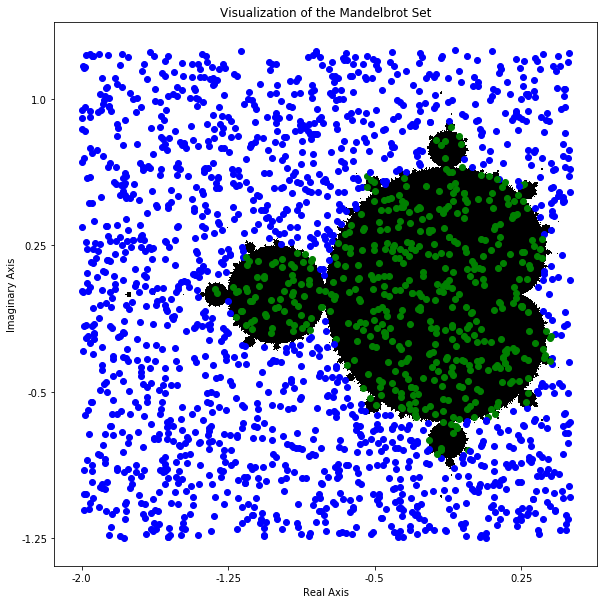

In [13]:
# number of points we 'throw' at set
n = 2000

# area we're looking at
xmin = -2
xmax = 0.5
ymin = -1.25
ymax = 1.25

# make plot with the set and all random points in or out the set
area_set = area_mandelbrot_set(xmin, xmax, ymin, ymax, 10, 10, n, 230, True)
print("The computed area of the mandelbrot set is {:.2f}.".format(area_set))

### Vary the number of simulations for all sampling methods

Normally distributed
Normally distributed
Normally distributed
Normally distributed


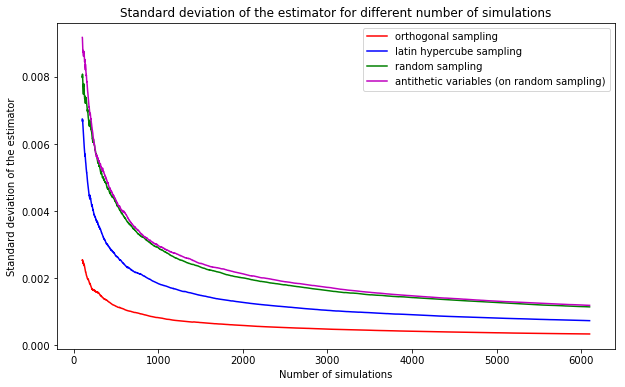

In [43]:
# specify number of random points, iterations and total number of samples
s = 900
iterations = 2000
k = 6000

# compute the area & std for the different methods
fin_area_ortho, fin_std_ortho, num_sim_list = area_std_ortho_vary_numsim(iterations, s, k)
fin_area_latinh, fin_std_latinh, num_sim_list = area_std_latinh_vary_numsim(iterations, s, k)
fin_area_rs, fin_std_rs, num_sim_list = area_std_rs_vary_numsim(iterations, s, k)
fin_area_anti, fin_std_anti, num_sim_list = area_std_anti_vary_numsim(iterations, s, k)

# plot the area with the std against the number of simulations for different methods
plt.plot(num_sim_list, fin_std_ortho, 'r', label='orthogonal sampling')
plt.plot(num_sim_list, fin_std_latinh, 'b', label='latin hypercube sampling')
plt.plot(num_sim_list, fin_std_rs, 'g', label='random sampling')
plt.plot(num_sim_list, fin_std_anti, 'm', label = 'antithetic variables (on random sampling)')
plt.title('Standard deviation of the estimator for different number of simulations')
plt.xlabel('Number of simulations')
plt.ylabel('Standard deviation of the estimator')
plt.legend()

### Vary the number of iterations for all sampling methods

In [ ]:
# choose iteration values
iter_list = np.linspace(100,10000, 10)
s = 900
num_sim = 2000

# compute areas and stds for all methods
fin_area_latinh, fin_std_latinh = area_std_latinh(iter_list, num_sim, s)
fin_area_anti, fin_std_anti = area_std_antithetic(iter_list, num_sim, s)
fin_area_rs, fin_std_rs = area_std(iter_list, num_sim, s)
fin_area_ortho, fin_std_ortho = area_std_ortho(iter_list, num_sim, s)

# plot area with confidence interval against number of iterations
plt.figure(1)
plt.errorbar(iter_list, fin_area_rs, fin_std_rs, c='b', capsize=5, label='rs', fmt='--o')
plt.title('Area of the Mandelbrot Set Using Random Sampling')
plt.xlabel('Number of iterations')
plt.ylabel('Area')
plt.show()

plt.figure(2)
plt.errorbar(iter_list, fin_area_anti, fin_std_anti, capsize=5, c='r', label='anti', fmt='--o')
plt.title('Area of the Mandelbrot Set Using Antitethic Variables (on Random Sampling)')
plt.xlabel('Number of iterations')
plt.ylabel('Area')
plt.show()

plt.figure(3)
plt.errorbar(iter_list, fin_area_latinh, fin_std_latinh, capsize=5, c= 'g', label='latinh', fmt='--o')
plt.title('Area of the Mandelbrot Set using Latin Hypercube Sampling')
plt.xlabel('Number of iterations')
plt.ylabel('Area')
plt.show()

plt.figure(4)
plt.errorbar(iter_list, fin_area_ortho, fin_std_ortho, capsize=5, c='m', label='ortho', fmt='--o')
plt.title('Area of Mandelbrot Set using Orthogonal Sampling')
plt.xlabel('Number of iterations')
plt.ylabel('Area')
plt.show()